<a href="https://colab.research.google.com/github/paulzl/Assignment_session03_paulzl/blob/main/Amenities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dependencies

In [ ]:
!pip install osmnx 
!python3 -m pip install numba               
!pip install momepy

In [ ]:
import osmnx as ox 
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import geopandas as gpd
import momepy

#Aminities

In [ ]:

place_name= "Barcelona, Barcelonès, Barcelona, Catalonia, 08001, Spain"
G = ox.graph_from_place(place_name, network_type='walk', simplify=True) #other network types: drive, bike, drive_service, all, all_private



In [ ]:
#Get houses
#Get residential buildings 
tags4 = {'building': 'residential'}
residentials = ox.geometries_from_place(place_name, tags4)
#Get services
tags2 = {'amenity': 'pharmacy'}
pharmacies = ox.geometries_from_place(place_name, tags2)

In [ ]:
#Retrieve nodes and edges from the graph
pcs="epsg:32642"  #project the graph from a geographic to a projected coordinates system
G=ox.project_graph(G,to_crs=pcs)
nodes, edges = ox.graph_to_gdfs(G)

In [ ]:
#Get boundary area by a place name
boundary = ox.geocode_to_gdf(place_name)
boundary=ox.projection.project_gdf(boundary, to_crs=pcs, to_latlong=False)      #project

In [ ]:
pharmacies

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


addr:city                      addr:full  \
element_type osmid                                                   
node         82753755     Barcelona       carrer Ramon I Cajal, 24   
             82781675     Barcelona                carrer Verdi, 7   
             82781676     Barcelona            carrer Asturies, 54   
             192325938    Barcelona  carrer Nou de Les Rambles, 75   
             194526301    Barcelona  carrer Nou de Les Rambles, 28   
...                             ...                            ...   
             10175872732        NaN                            NaN   
             10199003317        NaN                            NaN   
             10312705312        NaN                            NaN   
             10692618305        NaN                            NaN   
way          902488845    Barcelona              carrer Alella, 12   

                         addr:housenumber addr:postcode  \
element_type osmid                                        
node         82753755                  24         08012   
             82781675                   7         08012   
             82781676                  54         08012   
             192325938                 75         08001   
             194526301                 28         08001   
...                                   ...           ...   
             10175872732              NaN           NaN   
             10199003317              NaN           NaN   
             10312705312              NaN           NaN   
             10692618305              NaN           NaN   
way          902488845                 12         08016   

                                        addr:street   amenity contact:phone  \
element_type osmid                                                            
node         82753755       Carrer de Ramón y Cajal  pharmacy  +34932135817   
             82781675               Carrer de Verdi  pharmacy  +34932133048   
             82781676             Carrer d'Astúries  pharmacy  +34932186196   
             192325938    carrer Nou de Les Rambles  pharmacy  +34932410377   
             194526301    carrer Nou de Les Rambles  pharmacy  +34933184942   
...                                             ...       ...           ...   
             10175872732                        NaN  pharmacy           NaN   
             10199003317                        NaN  pharmacy           NaN   
             10312705312                        NaN  pharmacy           NaN   
             10692618305                        NaN  pharmacy           NaN   
way          902488845              Carrer d'Alella  pharmacy  +34933523954   

                         dispensing healthcare  \
element_type osmid                               
node         82753755           yes   pharmacy   
             82781675           yes   pharmacy   
             82781676           yes        NaN   
             192325938          yes   pharmacy   
             194526301          yes   pharmacy   
...                             ...        ...   
             10175872732        yes        NaN   
             10199003317        NaN        NaN   
             10312705312        NaN        NaN   
             10692618305        NaN        NaN   
way          902488845          yes   pharmacy   

                                                                       name  \
element_type osmid                                                            
node         82753755                       Farmàcia Mauri Martínez, Emília   
             82781675     Farmàcia Valentines Nart, T - Gelabert Valentines   
             82781676                                  Farmàcia del diamant   
             192325938                       Farmàcia Bombardo Vial, Miquel   
             194526301                    Farmàcia Nieto Calm, Maria Dolors   
...                                                                     ...   
             10175872732            

In [ ]:
residentials['geometry']=residentials['geometry'].to_crs(pcs)
pharmacies['geometry']=pharmacies['geometry'].to_crs(pcs)

<Axes: >

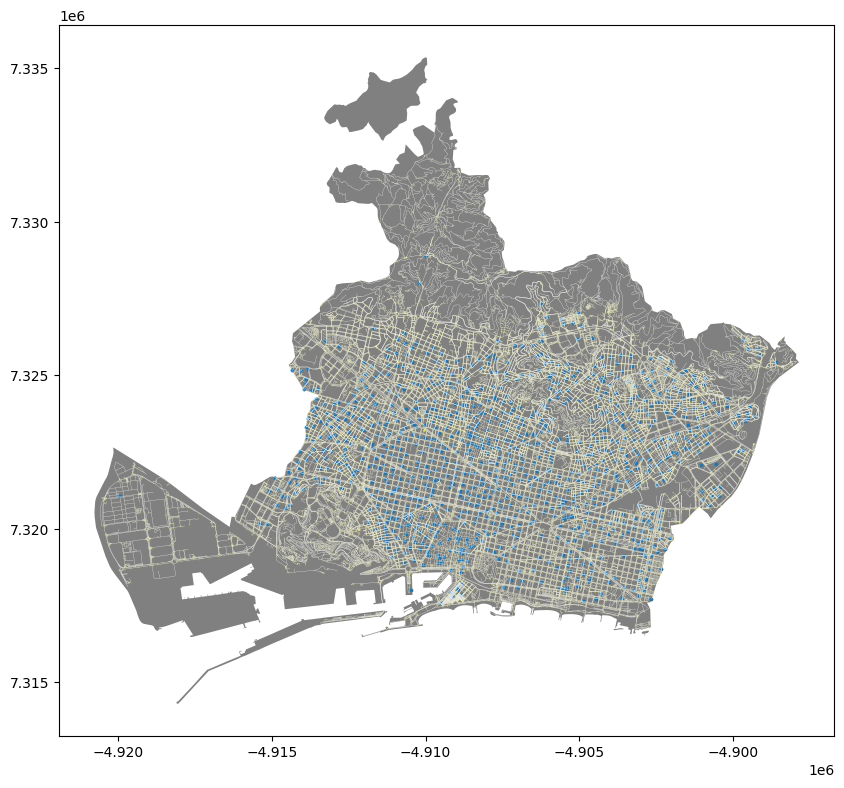

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
boundary.plot(ax=ax, facecolor='gray')
edges.plot(ax=ax, linewidth=0.1, edgecolor='white')
nodes.plot(ax=ax, color='yellow', markersize=0.0003)
pharmacies.plot(ax=ax,facecolor='green',markersize=3 ) 

#Shape file

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
f="zip:///content/drive/MyDrive/ZONING_BOUNDARIES_SHP.ZIP"
import geopandas as gpd
df = gpd.read_file(f)
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,GIS_ID,ZONING_DES,geometry
0,472.0,CR2,"POLYGON Z ((488980.768 5463881.871 0.000, 4889..."
1,473.0,RS9,"POLYGON Z ((488992.436 5464156.766 0.000, 4889..."
2,474.0,PA1,"POLYGON Z ((488830.605 5464122.078 0.000, 4888..."
3,476.0,CD44,"POLYGON Z ((488830.605 5464122.078 0.000, 4888..."
4,600.0,AC1,"POLYGON Z ((488663.857 5463953.401 0.000, 4887..."
...,...,...,...
272,678.0,CD78,"POLYGON Z ((489879.389 5465281.402 0.000, 4898..."
273,679.0,CD79,"POLYGON Z ((480155.204 5469111.350 0.000, 4801..."
274,680.0,CD80,"POLYGON Z ((490809.490 5465019.425 0.000, 4908..."
275,681.0,CD81,"POLYGON Z ((490213.431 5464446.146 0.000, 4903..."
